In [1]:
import pandas as pd
import numpy as np

In [2]:
transactions = pd.read_excel('../OneDrive_1_2024-2-19/transactions.xlsx')

In [3]:
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

In [4]:
transactions = transactions.sort_values(by=['client_id', 'transaction_date'])

In [5]:
client_ids = transactions['client_id'].unique()

In [6]:
transactions['days_between_transactions'] = transactions.groupby('client_id')['transaction_date'].diff().dt.days
transactions[['client_id', 'transaction_date', 'days_between_transactions']]

,client_id,transaction_date,days_between_transactions
23994,c00029531,2020-09-25,NaN
23993,c00029531,2020-10-04,9.0
23992,c00029531,2021-03-15,162.0
45615,c00055636,2018-07-20,NaN
45362,c00055636,2018-12-19,152.0
...,...,...,...
48552,c99978675,2018-06-02,NaN
48555,c99978675,2018-12-07,188.0
45947,c99989096,2020-12-28,NaN
47715,c99995560,2018-07-13,NaN


In [7]:
transactions_1 = transactions[['client_id', 'transaction_date', 'days_between_transactions']].copy()
transactions_1.dropna(inplace=True)
average_days_between_transactions = transactions_1.groupby('client_id')['days_between_transactions'].mean().reset_index()

In [8]:
average_days_between_transactions

,client_id,days_between_transactions
0,c00029531,85.500000
1,c00055636,152.000000
2,c00068475,209.000000
3,c00089184,10.000000
4,c00107911,83.833333
...,...,...
4099,c99915206,111.750000
4100,c99921868,283.666667
4101,c99936245,19.578947
4102,c99976540,0.000000


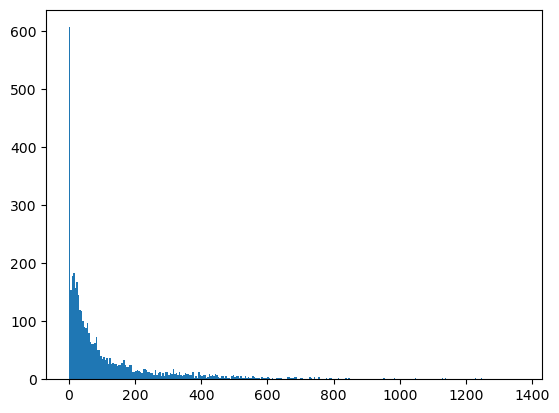

In [9]:
# plot the histogram for checking the distribution of the average days between transactions
import matplotlib.pyplot as plt
plt.hist(average_days_between_transactions['days_between_transactions'], bins=300)
plt.show()

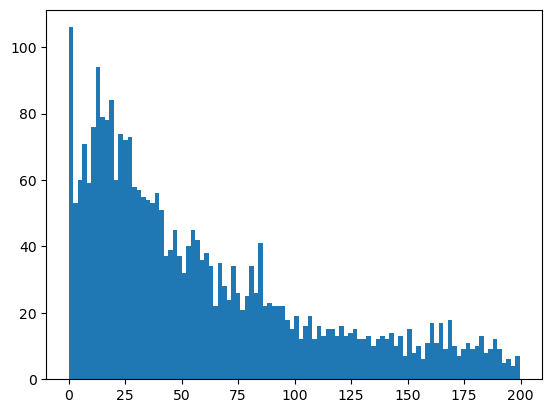

In [10]:
# plot the histogram for checking the distribution of the average days between transactions for all days less than 30
plt.hist(average_days_between_transactions[(average_days_between_transactions['days_between_transactions'] < 200) & (average_days_between_transactions['days_between_transactions'] > 0)]['days_between_transactions'], bins=100)
plt.show()